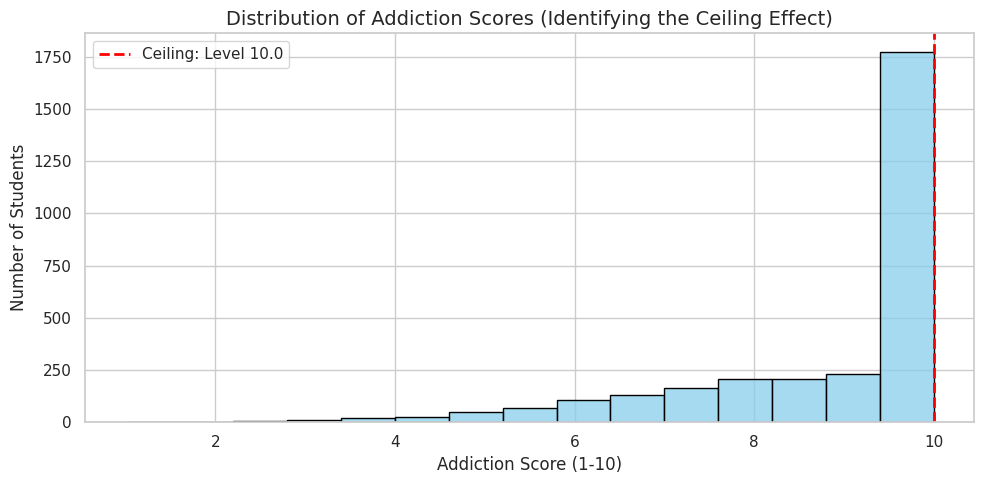

/tmp/ipython-input-3192388155.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Risk_Category', order=order, palette='Reds_r')


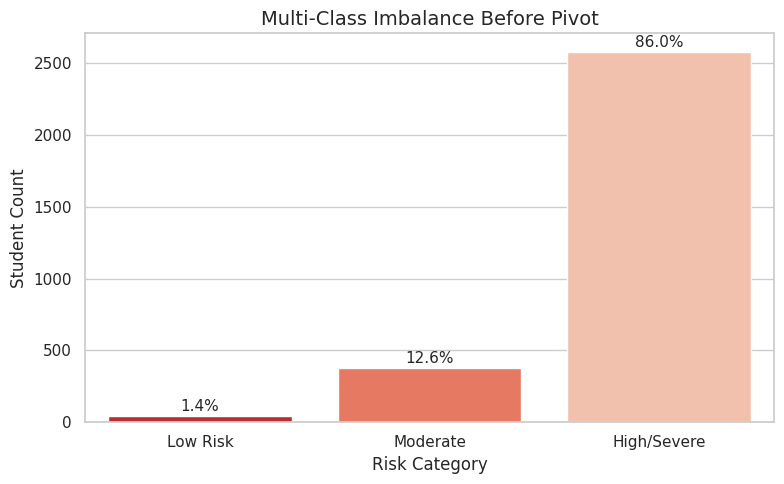

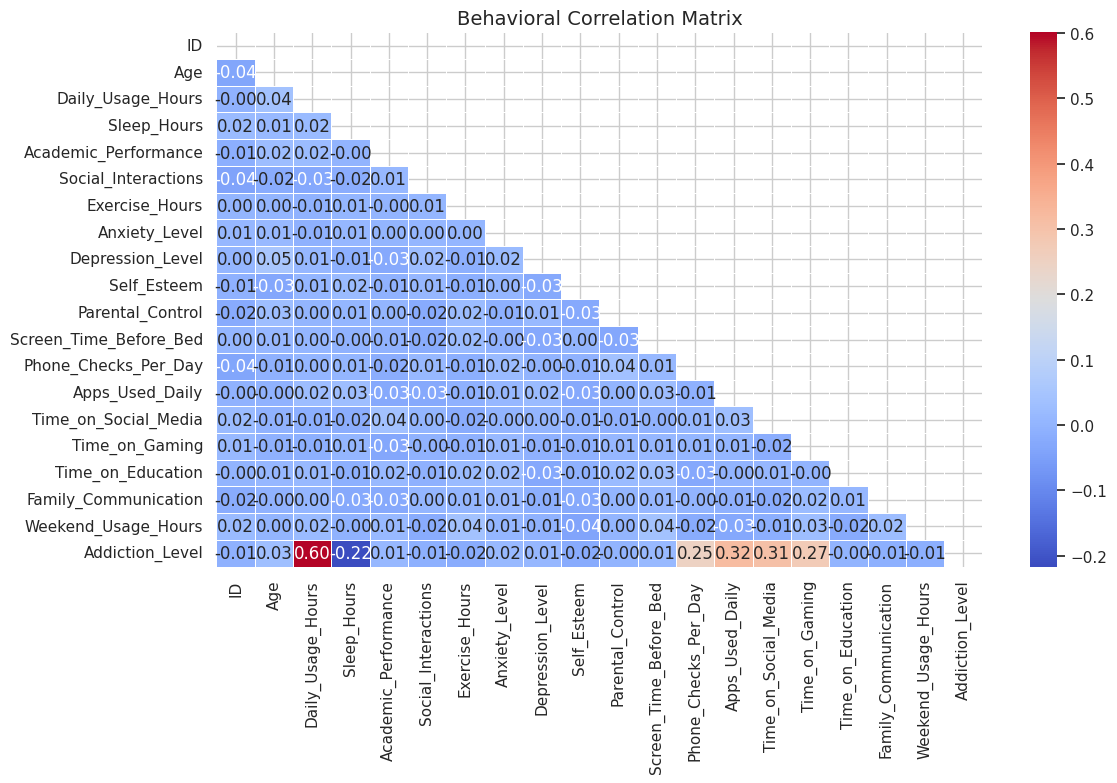

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean, professional style for the plots
sns.set_theme(style="whitegrid")

# 1. Load Data

df = pd.read_csv('/content/teen_phone_addiction_dataset.csv')

# 2. Plot 1: The "Ceiling Effect" (Slide 6)
# Standard Histogram shows where the data 'piles up'
plt.figure(figsize=(10, 5))
sns.histplot(df['Addiction_Level'], bins=15, kde=False, color='skyblue', edgecolor='black')
plt.axvline(10.0, color='red', linestyle='--', linewidth=2, label='Ceiling: Level 10.0')
plt.title('Distribution of Addiction Scores (Identifying the Ceiling Effect)', fontsize=14)
plt.xlabel('Addiction Score (1-10)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#

# 3. Plot 2: Pre-Pivot Class Imbalance (Slide 6)
# Simple Bar Chart to show the 56:1 imbalance problem
def categorize(score):
    if score < 4.0: return 'Low Risk'
    elif score < 7.0: return 'Moderate'
    else: return 'High/Severe'

df['Risk_Category'] = df['Addiction_Level'].apply(categorize)
order = ['Low Risk', 'Moderate', 'High/Severe']

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Risk_Category', order=order, palette='Reds_r')
plt.title('Multi-Class Imbalance Before Pivot', fontsize=14)
plt.xlabel('Risk Category', fontsize=12)
plt.ylabel('Student Count', fontsize=12)

# Adding percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=11)

plt.tight_layout()
plt.show()

#

# 4. Plot 3: Feature Correlation
# Heatmap to show which behaviors drive addiction
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Create a mask to show only the bottom half (Standard for professional reports)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Behavioral Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

#